#### PyTorch

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

In [2]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print('current cuda device is', device)

current cuda device is cuda


In [3]:
batch_size = 50
learning_rate = 0.0001
epoch_num = 15

In [4]:
train_data = datasets.MNIST(root = './data',
                            train = True,
                            download= True,
                            transform = transforms.ToTensor())
test_data = datasets.MNIST(root = './data',
                           train = False,
                           transform = transforms.ToTensor())

print('number of traing data:',len(train_data))
print('number of test data:', len(test_data))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.54MB/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 150kB/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.42MB/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 539kB/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

number of traing data: 60000
number of test data: 10000


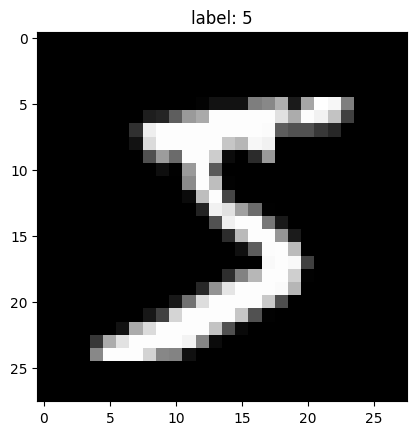

In [5]:
image, label = train_data[0]

plt.imshow(image.squeeze().numpy(), cmap ='gray')
plt.title('label: %s' % label)
plt.show()

In [6]:
train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                            batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                          batch_size = batch_size, shuffle = True)

first_batch = train_loader.__iter__().__next__()

In [7]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1,32,3,1,padding='same')
        self.conv2 = nn.Conv2d(32,64,3,1,padding='same')
        self.dropout = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(3136,1000) # 7*7*64=3436
        self.fc2 = nn.Linear(1000,10)
    
    def forward(self,x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        x = self.dropout(x)
        x = torch.flatten(x,1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [8]:
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
criterison = nn.CrossEntropyLoss()

In [9]:
model.train()
i = 1
for epoch in range(epoch_num):
    for data, target in train_loader:
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterison(output, target)
        loss.backward()
        optimizer.step()
        if i % 1000 == 0:
            print('train step: {}\t loss: {:.3f}'.format(i, loss.item()))
            
        i += 1

train step: 1000	 loss: 0.108
train step: 2000	 loss: 0.323
train step: 3000	 loss: 0.146
train step: 4000	 loss: 0.014
train step: 5000	 loss: 0.027
train step: 6000	 loss: 0.009
train step: 7000	 loss: 0.082
train step: 8000	 loss: 0.031
train step: 9000	 loss: 0.019
train step: 10000	 loss: 0.004
train step: 11000	 loss: 0.027
train step: 12000	 loss: 0.034
train step: 13000	 loss: 0.003
train step: 14000	 loss: 0.001
train step: 15000	 loss: 0.001
train step: 16000	 loss: 0.005
train step: 17000	 loss: 0.000
train step: 18000	 loss: 0.002


#### GPU에서 4분 소요!

In [10]:
# 모델 저장
torch.save(model.state_dict(), 'mnist_model.pth')